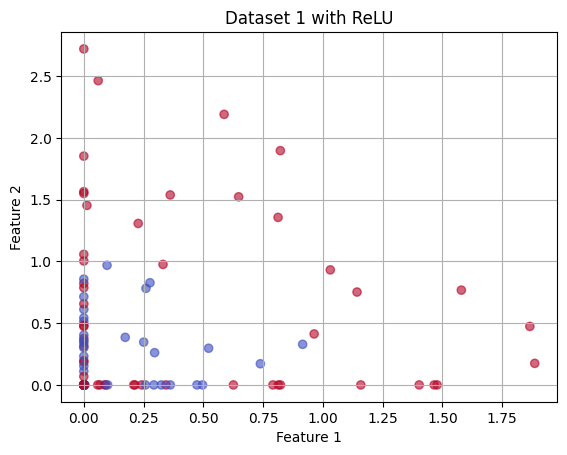

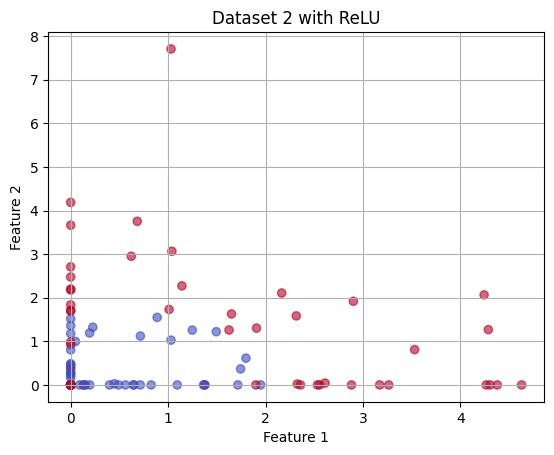

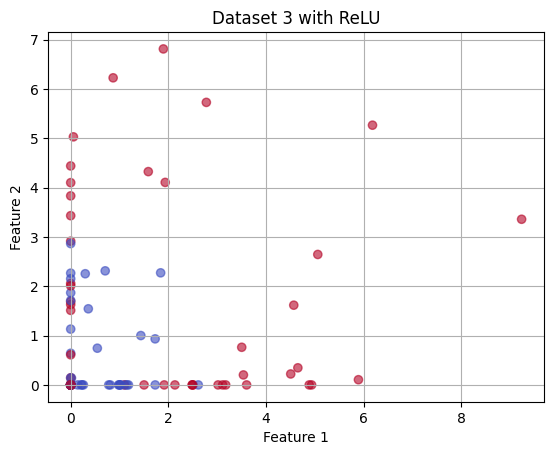

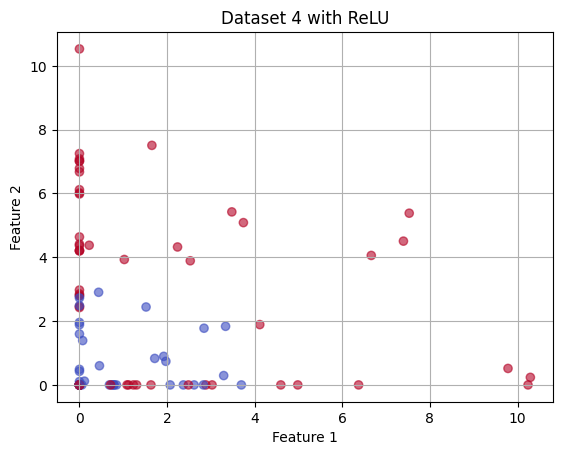

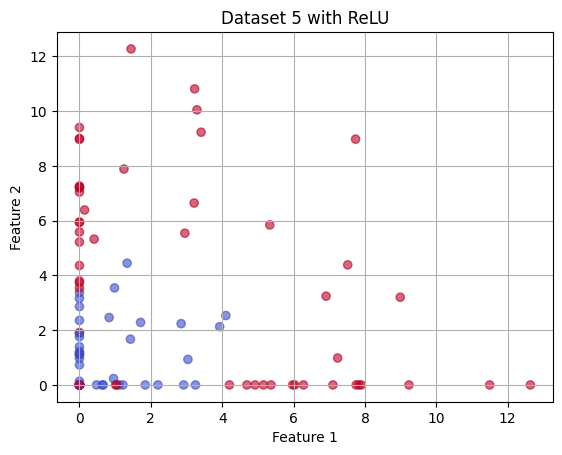

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

np.random.seed(42)
datasets = []

for i in range(5):
    x = np.random.randn(100, 2) * (i + 1)
    label = (np.linalg.norm(x, axis=1) > (i + 1)).astype(int)  # arbitrary class separation
    x_relu = relu(x)

    df = pd.DataFrame(x_relu, columns=['Feature 1', 'Feature 2'])
    df['Label'] = label
    datasets.append(df)

    # Plot
    plt.figure()
    plt.scatter(df['Feature 1'], df['Feature 2'], c=label, cmap='coolwarm', alpha=0.6)
    plt.title(f"Dataset {i+1} with ReLU")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class SimpleStoneGoldCNN(nn.Module):
    def __init__(self):
        super(SimpleStoneGoldCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # ReLU #1
        x = self.pool(F.relu(self.conv2(x)))  # ReLU #2
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))               # ReLU #3
        x = self.fc2(x)
        return x

# Dummy dataset (100 stone, 100 gold)
x_data = torch.randn(200, 1, 28, 28)
y_data = torch.cat((torch.zeros(100, dtype=torch.long), torch.ones(100, dtype=torch.long)))

dataset = TensorDataset(x_data, y_data)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

# Train loop
model = SimpleStoneGoldCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    for images, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.6598
Epoch 2, Loss: 0.6876
Epoch 3, Loss: 0.6864
Epoch 4, Loss: 0.6814
Epoch 5, Loss: 0.6916
